## Programming Assignment: Linear Regression with Multiple Variable

Trong bài tập này, các bạn sẽ thực hiện dự giá nhà từ diện tích và số phòng ngủ.

### Hướng dẫn làm bài 
- Trong bài tập này bạn sẽ sử dụng Python 3.
- Cố gắng không sử dụng các vòng lặp (for, while). 
- Hãy sử dụng các hàm của thư viện numpy.
- Chúng ta cũng sẽ sử dụng thư viện __scikit-learn__ để kiểm tra kết quả
- Sau khi bạn viết Code của mình xong, hãy chạy dòng Code đó để xem kết quả bên dưới. 

Các bạn sẽ bắt đầu Code trong phần `### START CODE HERE ###` và `### END CODE HERE ###`. Các bạn nhớ đừng sửa bất kỳ dòng Code nào bên ngoài những câu lệnh này. 


In [1]:
# import các thư viện 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn; seaborn.set_style("whitegrid")

### Linear Regressiong đa biến

Về cơ bản, bài toán hồi quy tuyến tính đa biến cũng tương tự bài toán hồi quy tuyến tính đơn biến. Tuy nhiên, trong bài này, chúng ta sẽ sử dụng Vecto hoá thay vì sử dụng vòng lặp.

In [2]:
# đọc dữ liệu từ file data.txt 
data = np.loadtxt('./data.txt', delimiter=',')   
x, y = data[:, :2], data[:, 2]

In [6]:
# xem trước 5 dữ liệu đầu tiên
print(x[:5])
print(y[:5])

[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]
[399900. 329900. 369000. 232000. 539900.]


### 1. Trực quan hoá dữ liệu

Việc trực quan hoá dữ liệu sẽ phần nào giúp chúng ta hình dung bộ dữ liệu ra sao.

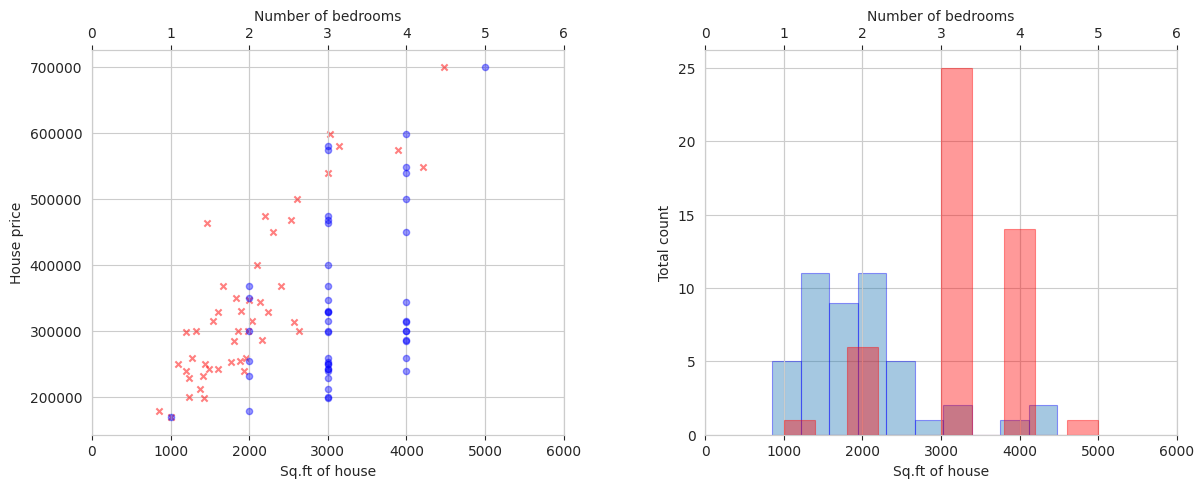

In [9]:
fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(wspace=0.3)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Scatter plots:
ax1.scatter(x[:,0], y, marker='x', c='r', alpha=0.5, s=20)
ax1.set_xlabel('Sq.ft of house')
ax1.set_ylabel('House price')
ax1.set_xlim(0, 6000)

ax3 = ax1.twiny()
ax3.scatter(x[:,1], y, marker='o', c='b', alpha=0.4, s=20)
ax3.set_xlabel('Number of bedrooms')
ax3.set_xlim(0, 6)

# Histograms:
ax2.hist(x[:,0], alpha=0.4, edgecolor='b', linewidth=0.8)
ax2.set_xlabel('Sq.ft of house')
ax2.set_ylabel('Total count')
ax2.set_xlim(0, 6000)

ax4 = ax2.twiny()
ax4.hist(x[:,1], alpha=0.4, color='r', edgecolor='r', linewidth=0.8)
ax4.set_xlabel('Number of bedrooms')
ax4.set_xlim(0, 6);

plt.show()

### 2. Chuẩn hoá dữ liệu 

**Bài tập 1:** Chuẩn hoá dữ liệu 

Nhắc lại: Standardization (còn được gọi là z-score normalization) biến đổi dữ liệu sao cho phân phối của kết quả có giá trị trung bình ($\mu$) bằng 0 và độ lệch chuẩn ($\sigma$) bằng 1. Khi đó, công thức chuẩn hoá là:

<center> $x' = \frac{x - x_{mean}}{\sigma}$ </center>

Trong đó:
- $x'$: giá trị sau chuẩn hoá.
- $x$: giá trị ban đầu.
- $x_{mean}$: giá trị mean của bộ dữ liệu.
- $\sigma$: phương sai (standard deviation).

Công thức z-score trong thống kê được định nghĩa:

<center> $x' = \frac{x - \mu}{\sigma}$ </center>

In [11]:
def featureNormalize(X):
    """
    mu: giá trị mean
    sigma: phương sai (standard deviation)
    X_norm: giá trị sau chuẩn hoá
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

Chuẩn hoá dữ liệu Training:

In [15]:
# In dữ liệu trước khi chuẩn hoá
print(x[:5])

[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]


In [16]:
# Chuẩn hoá dữ liệu 
X, mean, sigma = featureNormalize(x)

In [17]:
# Dữ liệu sau khi chuẩn hoá
print(X[:5])

[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]


**Đầu ra kỳ vọng**: 
<table>
    <tr><td> [[ 0.13141542 -0.22609337] <td></tr>
    <tr><td>  [-0.5096407  -0.22609337] <td></tr>
    <tr><td> [ 0.5079087  -0.22609337] <td></tr>
    <tr><td> [ 1.27107075  1.10220517]] <td></tr>
</table> 

Trực quan hoá dữ liệu sau khi chuẩn hoá

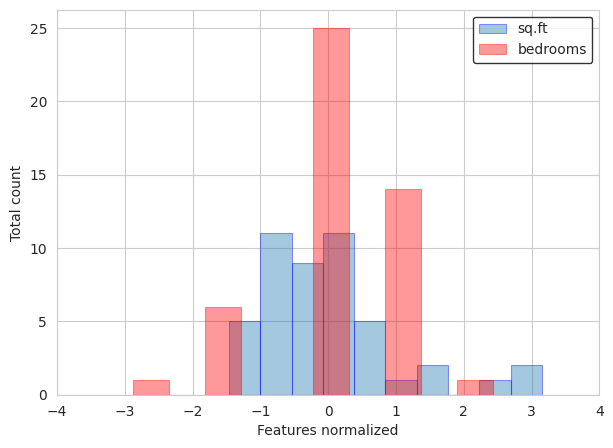

In [19]:
fig = plt.figure(figsize=(7, 5))

# Histograms:
plt.hist(X[:,0], alpha=0.4, edgecolor='b', linewidth=0.8, label='sq.ft')
plt.hist(X[:,1], alpha=0.4, color='r', edgecolor='r', linewidth=0.8, label='bedrooms')
plt.xlabel('Features normalized')
plt.ylabel('Total count')
plt.xlim(-4, 4)
pst = plt.legend(loc='best', frameon=True)
pst.get_frame().set_edgecolor('k');

plt.show()

### 3. Gradient Descent

**Bài tập 2**: Thực hiện thêm cột 1 vào X

Để thuận tiện cho việc tính toán, chúng ta coi $\theta_0 \times x_0$ với $x_0 = 1$. Khi đó:

<br><center> $\hat{y} = h_{\theta}(x) = \theta_0{x_0} + \theta_1{x_1} + \theta_2{x_2} + \theta_3{x_3} + ... +    \theta_n{x_n}$</center>

**Chú ý:** $x_0 = 1$


>$ X = \begin{bmatrix}
 1 & x_1 ^{(1)} & \cdots \\ 
 1 & x_1^{(2)} & \cdots \\ 
 1 & x_1^{(3)} & \cdots 
\end{bmatrix}; \theta = \begin{bmatrix}
\theta_0\\ 
\theta_1\\
\vdots
\end{bmatrix} $

In [18]:
"""
Gợi ý sử dụng: np.ones và np.hstack
"""

X = np.hstack([np.ones((X.shape[0], 1)), X])

In [19]:
print(X[:5])

[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]


**Đầu ra kỳ vọng**: 
```Python 
[[ 1.          0.13141542 -0.22609337]
[ 1.         -0.5096407  -0.22609337]
[ 1.          0.5079087  -0.22609337]
[ 1.         -0.74367706 -1.5543919 ]
[ 1.          1.27107075  1.10220517]]
```

Khởi tạo tham số:

In [20]:
theta = np.zeros(3)
iterations = 1500
alpha = 0.01

### Tính Cost Function J

**Bài tập 3:** Tính Cost Function J

Sử dụng Vector hoá:

<br><center>$J(\theta) = \dfrac{1}{2m} (X\theta - \vec{y} )^T(X\theta - \vec{y})$</center>

*Chú ý:* phép nhân Vector.

In [22]:
def computeCost(X, y, theta):
    m = len(y)
    
    ### START CODE HERE ### (≈ 1 line of code)   
    cost = (1/(2*m)) * np.sum((X.dot(theta) - y)**2)
    ### END CODE HERE ###    
    
    return cost

In [23]:
computeCost(X, y, theta)

65591548106.45744

**Đầu ra kỳ vọng**: 
<table>
    <tr><td> 65591548106.45744 <td></tr>
</table> 

**Bài tập 4:** Định nghĩa hàm Gradient Descent

> $\theta:= \theta - \frac{\alpha}{m} X^T (X\theta - \vec{y}) $


In [25]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    cost = np.zeros(iterations)
    thetaMod = theta.copy()
    thetaHist = np.zeros(iterations)
    
    for i in range(iterations):
        # Compute the gradient and update thetaMod
        thetaMod = thetaMod - (alpha/m) * X.T.dot(X.dot(thetaMod) - y)
        
        thetaHist[i] = thetaMod[1]
        cost[i] = computeCost(X, y, thetaMod)
    
    return thetaMod, thetaHist, cost

In [26]:
gradient, thetaHist, cost = gradientDescent(X, y, theta, alpha, iterations)  
print('theta[0]: {}\ntheta[1]: {}\ntheta[2]: {}'.format(gradient[0], gradient[1], gradient[2]))

theta[0]: 340412.563014392
theta[1]: 109370.05670466014
theta[2]: -6500.615095066833


**Đầu ra kỳ vọng**: 
<table>
    <tr><td> theta[0]: 340412.563014392 <td></tr>
    <tr><td> theta[1]: 109370.05670466014 <td></tr>
    <tr><td> theta[2]: -6500.615095066833 <td></tr>
</table> 

Vẽ hàm Loss:

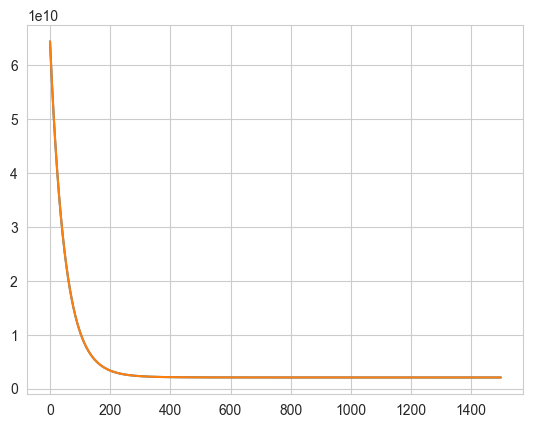

In [28]:
plt.plot(cost)
plt.show()

### 4 Nghiệm với Scikit-learn

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)

model = reg.fit(x, y)

print('theta[0]: {}\ntheta[1]: {}\ntheta[2]: {}'.format(model.intercept_, model.coef_[0], model.coef_[1]))

theta[0]: 89597.90954279748
theta[1]: 139.21067401762554
theta[2]: -8738.019112327831


**Nhận xét:** kết quả Loss khi sử dụng Gradient Descent mặc dù giảm dần nhưng vẫn chưa tối ưu. Theta khi sử dụng Gradient Descent và Scikit-learn khác nhau khá lớn.

### 4. Tuỳ chọn Learning Rate cho Gradient Descent 

Bằng cách tuỳ chọn các Learning Rate khác nhau, chúng ta sẽ đi tìm Learning Rate tối ưu nhất.

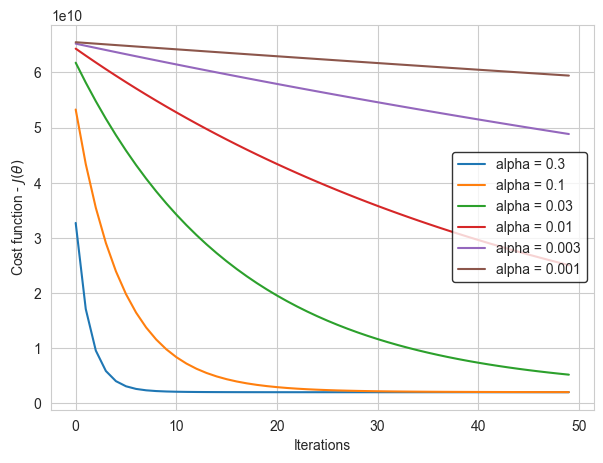

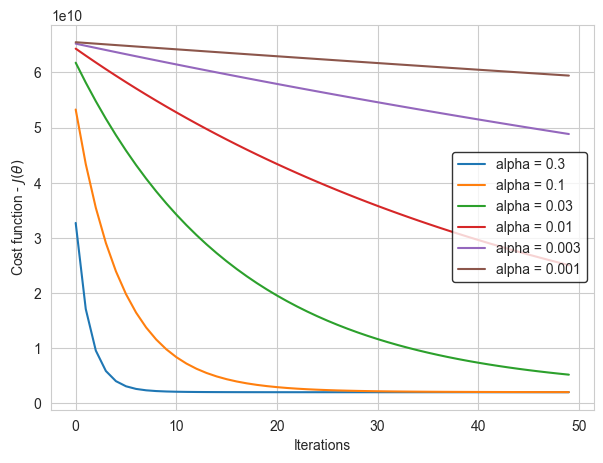

In [31]:
learningRates = [0.3, 0.1, 0.03, 0.01, 0.003, 0.001]

fig, ax = plt.subplots(figsize=(7, 5))

for alpha in learningRates:
    gradientNew, thetaHistNew, costNew = gradientDescent(X, y, theta, alpha, 50) 
    ax.plot(costNew, label='alpha = {0}'.format(alpha))

ax.set_ylabel(r"Cost function - $J(\theta)$")
ax.set_xlabel('Iterations')
pst = plt.legend(loc='best', frameon=True)
pst.get_frame().set_edgecolor('k');
plt.show()

Ta nhận thấy learning rate phù hợp nhất ở đây là __0.03__

### 5. Thực hiện dự đoán 

In [32]:
# Chạy lại thuật toán với LR tối ưu = 0.03
gradient, thetaHist, cost = gradientDescent(X, y, theta, 0.03, 500)  

# normalizing parameters:
paramsNorm = (np.array([1650, 3]) - mean) / sigma

# thêm cột 1 vào paramsNorm
params = np.hstack((np.array([1]), paramsNorm))

# Dự đoán giá nhà
predict = np.dot(gradient, params)
print ('A 3 bedroom / 1650 sqft house will cost $%0.2f' % predict)

A 3 bedroom / 1650 sqft house will cost $293097.99


**Đầu ra kỳ vọng**: 
<table>
    <tr><td> A 3 bedroom / 1650 sqft house will cost $293097.99 <td></tr>
</table> 

### 6. Nghiệm bằng Normal Equation (Theo phương pháp thông thường)

Normal Equation là phương pháp tìm nghiệm của bài toán Linear Regression mà không cần tới vòng lặp, không cần lựa chọn Learning Rate. Và cũng không cần phải Scaling dữ liệu.

Và công thức quan trọng nhất của chúng ta:

<center> $\theta = (X^T X)^{-1} X^Ty $ </center>

So sánh giữa Normal Equation và Gradient Descent:

<table>
  <tr>
    <td> Gradient Descent </td>
    <td> Normal Equation </td>
  </tr>

  <tr>
    <td> Cần phải chọn Learning Rate </td>
    <td> Không cần chọn Learning Rate </td> 
  </tr>
  
  <tr>
    <td> Cần nhiều vòng lặp </td>
    <td> Không cần vòng lặp </td>
  </tr>
  
  <tr>
    <td> Thời gian tính: $O(kn^2)$ </td>
    <td> Thời gian tính: $O(n^3)$, cần phải tính ma trận nghịch đảo </td> 
  </tr>
  
   <tr>
    <td> Hoạt động tốt với dữ liệu lớn  </td>
    <td> Rất chậm với dữ liệu lớn </td> 
  </tr>
  
</table>

In [33]:
from numpy.linalg import inv

"""
Gợi ý sử dụng inv để tính ma trận nghịch đảo.
"""

# Định nghĩa hàm normal equation
def normalEqn(X, y):
    ### START CODE HERE ### (≈ 1 line of code) 
    theta = inv(X.T.dot(X)).dot(X.T).dot(y)
    ### END CODE HERE ###
    
    return theta

In [34]:
# Với Normal Equation ta cũng cần thêm vector cột 1 vào ma trận x
X = np.ones((len(x), 3))
X[:, 1:] = x

thetaN = normalEqn(X, y)

In [35]:
thetaN = normalEqn(X, y)
print('theta[0]: {}\ntheta[1]: {}\ntheta[2]: {}'.format(thetaN[0], thetaN[1], thetaN[2]))

theta[0]: 89597.90954279699
theta[1]: 139.21067401762542
theta[2]: -8738.019112327687


**Đầu ra kỳ vọng**: 
<table>
    <tr><td> theta[0]: 89597.90954279806 <td></tr>
    <tr><td> theta[1]: 139.21067401762548 <td></tr>
    <tr><td> theta[2]: -8738.019112327602 <td></tr>
</table> 

**Nhận xét:** Nghiệm bài toán khá sát với kết quả khi sử dụng thư viện __Scikit-learn__

In [36]:
# Dự đoán với căn nhà 1650 feet, 3 phòng ngủ 
params = np.array([1, 1650, 3]) 

predict = np.dot(thetaN, params)
print ('A 3 bedroom / 1650 sqft house will cost $%0.2f' % predict)

A 3 bedroom / 1650 sqft house will cost $293081.46


**Đầu ra kỳ vọng**: 
<table>
    <tr><td> A 3 bedroom / 1650 sqft house will cost $293081.46 <td></tr>
</table> 

### Tổng kết

Thông qua bài tập này, các bạn đã nắm vững các kiến thức về:

- Hồi quy tuyến tính đa biến
- Thực hiện tính toán trên các matrix / vector
- Đánh giá sự khác nhau giữ Gradient Descent và Normal Equation


### Tài liệu tham khảo 

[1] [CS220 - Machine Leanring]()